In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint,sample
from scipy import stats


np.random.seed(1)

In [ ]:
df = pd.DataFrame()
delta = 10
df['subjects'] = np.zeros(20000)
df['level'] = np.zeros(20000)
subject_array=[]
level_array=[]
for level in [0,1]:
  
  for subject in range(100):
    
    for trial in range(100):
      
      df['erp'] = np.random.normal(delta*level,1,100*100*2)
    
      subject_array.append(subject)

      
      level_array.append(level)
df['subjects'] = subject_array
df['level'] = level_array


In [ ]:
df = df.reset_index()

In [ ]:
sample_sizes = np.arange(10,110,10)
n_trials = np.arange(10,210,10)

In [ ]:
ex_subjects = []
tirals = []
i = 0
pw = pd.DataFrame({'power':[], 
              'sample_size':[], 
              'n_tirals':[]})







for sample_size in sample_sizes:# 10 20 30 40
  s = sample(list(df['subjects'].unique()), sample_size) #1 3 4 6 7 12 15
  
  for n_trial in n_trials: # 20 30 40 50
    
    
    power = []
    count = 0
    for iter in range(100):

      data = pd.DataFrame()
      data['subject'] = np.zeros(sample_size*n_trial)
      data['erp'] = np.zeros(sample_size*n_trial)
      data['level'] = np.zeros(sample_size*n_trial)
      
      sss = []
      x = []
      

      for ss in s:
        
        sss_ = [ss]*n_trial
        sss = np.concatenate([sss,sss_])

        x_ = sample(list(df.loc[df['subjects']==ss,'index']),n_trial)
        x = np.concatenate([x,x_])

     
      data['subject'] = sss

      data['erp'] = df.loc[df['index'].isin(x),'erp'].to_numpy()
      
      data['level'] = df.loc[df['index'].isin(x),'level'].to_numpy()

      t,p = stats.ttest_ind(data.loc[data['level']==0,'erp'],data.loc[data['level']==1,'erp']) #
      
      
      if p <= 0.05:
        count += 1
      
    power_ = count/100

    pw.loc[len(pw.index)] = [power_,sample_size,n_trial]





# test -> dataframe
# power
# plot
    







In [ ]:
pw

,power,sample_size,n_tirals
0,0.07,10.0,10.0
1,0.07,10.0,20.0
2,0.04,10.0,30.0
3,0.03,10.0,40.0
4,0.06,10.0,50.0
...,...,...,...
195,0.79,100.0,160.0
196,0.76,100.0,170.0
197,0.88,100.0,180.0
198,0.97,100.0,190.0


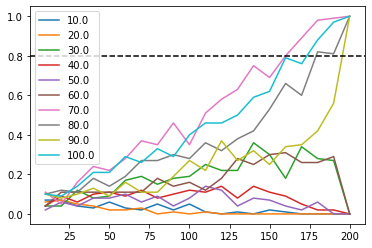

In [ ]:
for sample_size in pw['sample_size'].unique():
  p = pw[pw['sample_size']==sample_size]
  x = p.n_tirals
  y = p.power
  plt.plot(x,y,label = sample_size)
plt.axhline(0.8, color = 'black', ls='--')
plt.legend()
plt.show()